In [303]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import binom, beta, bernoulli

# Binomial distribution

- binomial distribution is used to calculate the probability of a certain number of successful outcomes, given a number of trials and the probability of the successful outcome. The “bi” in the term binomial refers to the two possible outcomes that we’re concerned with: an event happening and an event not happening


- binomial distribution gives probability of **hypothesis outcome** i.e `5 out of 10` when we already know probability of successful outcome.


- binomial distribution is function of number of successful outcomes. so in the Binomial distribution,  plot we always have number of outcome on X axis and probability of that outcome on Y axis. values present on X axis are finite discrete values and not continuous 

 ```binom.pmf(k) = choose(n, k) * p**k * (1-p)**(n-k)```


- Create binom object => binom_o = binom(n, p)  


- PMF => probability of `x` successful outcomes out of `n` trials when probability of a successful outcome is `p`


- CDF => probability of successful number of outcome having value `x` or less than `x`


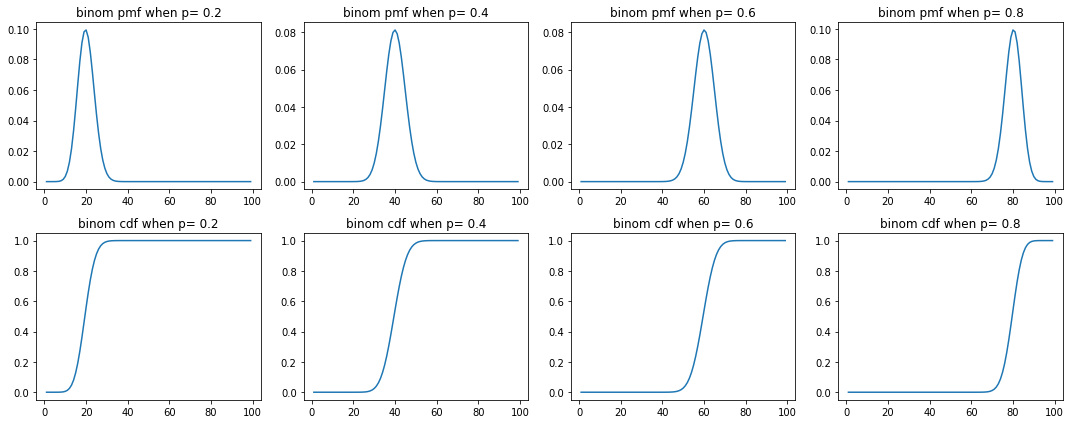

In [475]:
n  = 100

fig, ax = plt.subplots(2, 4, figsize=(15, 6))
x = np.arange(1, n)

# plot pmf and cdf 
for index, p in enumerate([0.2, 0.4, 0.6, 0.8]):
    binom_o = binom(n, p)
    ax[0][index].plot(x, binom_o.pmf(x))
    ax[0][index].set_title("binom pmf when p= {}".format(p))
    ax[1][index].plot(x, binom_o.cdf(x))
    ax[1][index].set_title("binom cdf when p= {}".format(p))

fig.tight_layout()

In [134]:
k =12
n = 24
p =0.5
print("pmf val at 12 is {}".format(binom.pmf(12, 24, 0.5)))
print("cdf val till 12 is {}".format(binom.cdf(12, 24, 0.5)))

pmf val at 12 is 0.16118025779724182
cdf val till 12 is 0.5805901288986203


In [137]:
# write cdf function 
def binom_cdf_function(k, n, p):
    binom_cdf_val = 0
    for i in range(k+1):
        binom_cdf_val += binom.pmf(i, n, p)
    return binom_cdf_val

binom_cdf_function(0, 100, 0.0072)

0.48548615474570517

In [141]:
# write 1-cdf, probability of success values > k
k = 0
1 - round(binom.cdf(k, 100, 0.0072, loc=0), 10)

0.5145138453

# Beta distribution


- Beta distribution is used to estimate the probability of an event for which you’ve already observed a number of trials and the number of successful outcomes. For example, you would use it to estimate the probability of flipping a heads when so far you have observed 100 tosses of a coin and 40 of those were heads.


- Beta distribution gives probability density of Probabilities(0-1) for observed successful outcomes. 
  so Beta distribution can be called as a function of probability. we have probability on X axis and we have probability density on Y axis for each hypothesis probability of X axis


- beta distribution represents probability density of continuous range of values, which allows us to represent our infinite number of possible hypotheses. In ohter words, It allows us to represent how strongly we believe in all possible probabilities for the data we observed. This enables us to perform statistical inference on observed data by determining which probabilities we might assign to an event and how strongly we believe in each one: a probability of probabilities


    
 `x` - hypothesis probability on X axis. This corresponds to our different hypotheses for the possible probabilities  
 `a` - number of times successful outcome was observed  
 `b` - number of times we did not get successful outcome  
 `a+b` - total number of trials done


                              gamma(a+b) * x**(a-1) * (1-x)**(b-1)  
         beta.pdf(x, a, b) = ------------------------------------   
                                      gamma(a)*gamma(b)              


- Create beta object => beta_o = beta(a, b) 


- PDF => probability density of probability


- CDF => CDF at x is integration of probabiltiy beta function from 0 to x. In other words, it tells probability of event happening a times out of (a+b) trials with probability less than x 
                                     

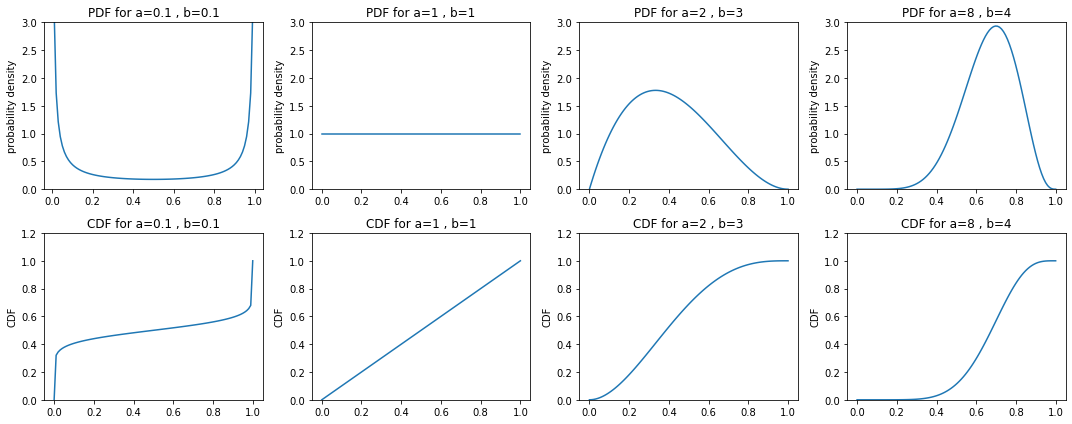

In [473]:
fig, ax = plt.subplots(2, 4, figsize=(15, 6))

x = np.linspace(0, 1, 100)

for idx, [a, b] in enumerate([[0.1, 0.1], [1, 1], [2, 3], [8, 4]]):
    
    # init beta with a and b 
    beta_o = beta(a,b)
    
    # plot PDF    
    ax[0][idx].plot(x, beta_o.pdf(x))
    ax[0][idx].set(title = "PDF for a={} , b={}".format(a, b), 
                   ylabel = "probability density", 
                   ylim = (0, 3))

   
    # plot CDF
    ax[1][idx].plot(x, beta_o.cdf(x))
    ax[1][idx].set(title = "CDF for a={} , b={}".format(a, b), 
                   ylabel = "CDF", 
                   ylim = (0, 1.2))

fig.tight_layout()

## Beta distributiion as a prior for binomial

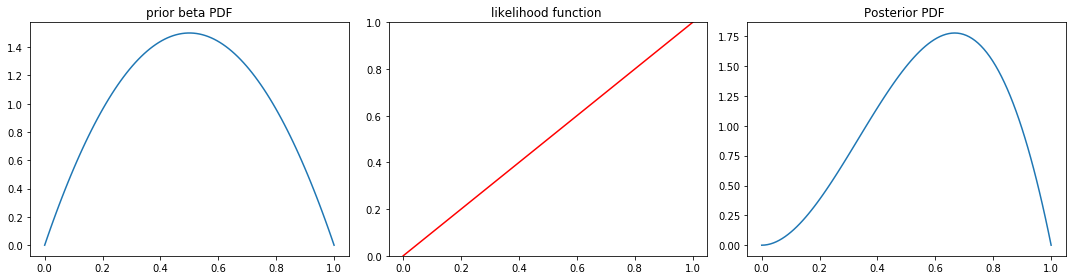

In [480]:
a = 2
b = 2
probability_0_to_1 = np.linspace(0, 1, 100)
X = np.arange(0, 100, 1)

# plot prior
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
prior_beta = beta(a , b)
ax[0].plot(probability_0_to_1, prior_beta.pdf(probability_0_to_1))
ax[0].set(title="prior beta PDF")

# plot likelihood function
ax[1].plot([0, 1], [0, binom.cdf([1], 1 , 1.0)], color = 'r')
ax[1].set(title="likelihood function ", ylim=(0,1))

# lets say we observed 1 successful outcome out of 1 trail, so success  = 1 and not_success = 0
success = 1
not_success = 0
posterior_beta = beta(success + a , not_success + b)
ax[2].plot(probability_0_to_1, posterior_beta.pdf(probability_0_to_1))
ax[2].set(title="Posterior PDF ")

fig.tight_layout()
